<a href="https://www.kaggle.com/code/burakayar/patient-project?scriptVersionId=160671530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*****PATIENT PROJECT*****

READ_ME_PLEASE

> #This beginner project is created by my own dataset. It is collected over 6 years. All datas inside are anonymized.
> #The shape of dataset are not big . So it is very beginnner friendly . 
> #All columns are designed as simple as it is . 

#importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# some arrangements................................
pd.set_option("display.max_columns", None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option("display.width", 500)


In [3]:
#uploading dataset
df = pd.read_excel("/kaggle/input/patientdemographic-disease-recorded/patient_project.xlsx")


In [4]:
##Catching the structure of dataset.
df.head(10)
df.shape
df.columns
df.info
df.describe()
df.nunique()
df.isnull().values.any()
df.dtypes


Patient_Code      object
Diseases          object
Sex               object
Recorded_Year      int64
Age              float64
dtype: object

In [5]:
#To analyze some data types can be tranformed in proper type.

df["Age"] = df["Age"].round().astype('Int64')
df["Recorded_Year"] = pd.to_numeric(df["Recorded_Year"], downcast="integer")
#checking code
df.dtypes

Patient_Code     object
Diseases         object
Sex              object
Recorded_Year     int16
Age               Int64
dtype: object

In [6]:
#Dropping NaN values
df = df.dropna(how='any')

#checking again
df.head(20)

,Patient_Code,Diseases,Sex,Recorded_Year,Age
1,PTN002,diabetes,female,2017,54
2,PTN003,anxiety disorder,female,2017,34
3,PTN004,anxiety disorder,female,2017,40
4,PTN005,weight problems,female,2017,29
5,PTN006,allergy,female,2017,50
6,PTN007,allergy,female,2017,46
7,PTN008,asthma,female,2017,48
8,PTN009,chronic fatigue syndrome,female,2017,43
9,PTN010,weight problems,female,2017,19
10,PTN011,asthma,female,2017,55


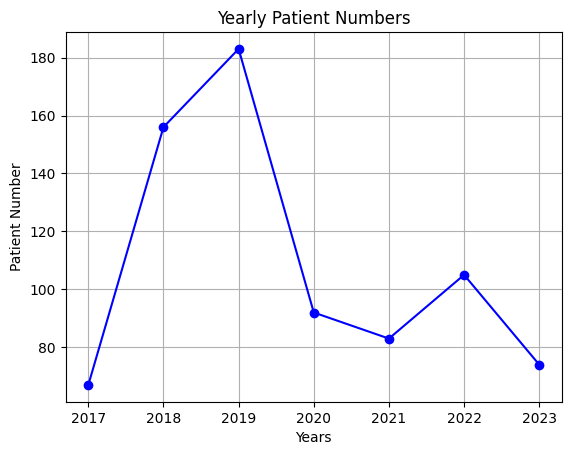

In [7]:
# how many patient recorded on yearly basis?
years = df['Recorded_Year'].unique()
patient_number = df.groupby('Recorded_Year')['Patient_Code'].count()
#Graph 1
plt.plot(years, patient_number, marker='o', linestyle='-', color='b')
plt.xlabel('Years')
plt.ylabel('Patient Number')
plt.title('Yearly Patient Numbers')
plt.grid(True)
plt.show()

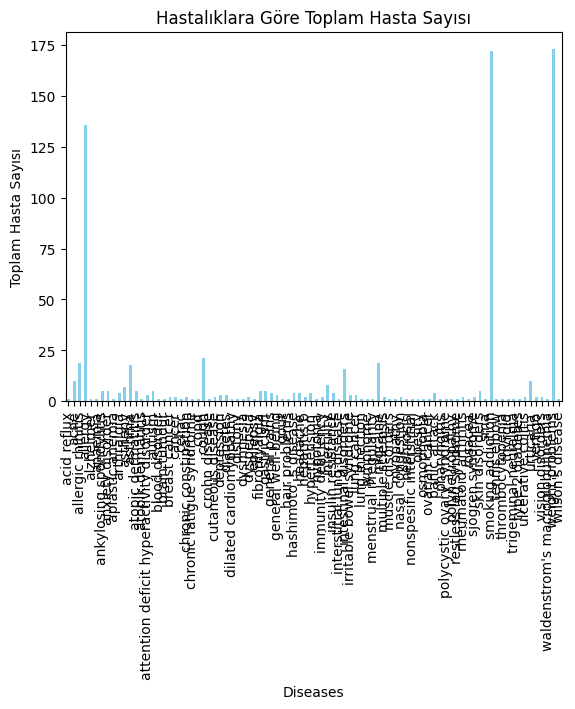

In [8]:
#how many patient came  on the basis of disease?
diseases_total_number = df.groupby('Diseases')['Patient_Code'].count()
diseases_total_number.plot(kind='bar', color='skyblue')
plt.title('Hastalıklara Göre Toplam Hasta Sayısı')
plt.xlabel('Diseases')
plt.ylabel('Toplam Hasta Sayısı')
plt.show()

#Note: graph is not proper to scale.

In [9]:
#diseases on yearly basis
yearly_count_disease = df.groupby('Recorded_Year').agg({'Diseases': 'count'})


In [10]:
#according to sex diseases and disease number breakdown & patient_ages_mean who have these diseases. 
df.groupby(['Sex','Diseases']).agg({"Age":['count','mean']})

Age           
                                                count       mean
Sex    Diseases                                                 
female acne                                         7       24.0
       allergic rhinitis                           14  38.857143
       allergy                                     86  39.453488
       alzheimer                                    1       72.0
       anaemia                                      1       39.0
       ankylosing spondylitis                       5       47.0
       anxiety disorder                             5       34.0
       arthralgia                                   4      50.75
       astheny                                      4      49.75
       asthma                                      14  48.642857
       atopic dermatitis                            1       34.0
       atopik dermatitis                            1       15.0
       attention deficit hyperactivity disorder     1        5.0
       autism                                       1        8.0
       blood disorder                               1       44.0
       breast cancer                                2       52.0
       cancer                                       2       61.0
       chronic constipation                         2       41.0
       chronic fatigue syndrome                     1       43.0
       copd                                         1       62.0
       cough                                       15       37.6
       crohn disease                                1       37.0
       cutaneous disease                            2       33.0
       depression                                   3  59.666667
       diabetes                                     2       56.5
       dilated cardiomyopathy                       1       17.0
       distony                                      1       60.0
       dyspepsia                                    1       56.0
       epilepsy                                     1       27.0
       fibromyalgia                                 5       43.2
       gastricism                                   5       42.0
       general pains                                4      56.25
       general well-being                           3  17.666667
       hair problems                                1       27.0
       hashimoto' s disease                         4       37.5
       headache                                     2       53.5
       hypertension                                 3  62.333333
       hypotonia                                    1        2.0
       infertility                                  7  38.285714
       insulin resistance                           3       36.0
       intestinal disorders                         9  41.222222
       lung cancer                                  1       45.0
       lung infection                               1       71.0
       lymphome                                     1       38.0
       menstrual irregularity                       1       34.0
       migraine                                    15  40.733333
       multiple sclerosis                           2       42.5
       muscle disorders                             1       61.0
       nasal congestion                             1       52.0
       osmophobia                                   1       37.0
       ovarian cancer                               1       67.0
       panic attack                                 1       37.0
       pharyngitis                                  1       39.0
       polycystic ovary syndrome                    1       37.0
       polyneuropathy                               1       30.0
       restless leg syndrome                        1       61.0
       rheumatoid arthritis                         2       49.0
       rosacea                                      1       33.0
       sjögren syndrome                             2       53.5
       skin disorder

In [11]:
#some conditions
df.loc[(df['Sex'] == 'female') & (df['Diseases'] == 'allergy'), ['Sex','Diseases']].shape[0]
df.loc[(df['Sex'] == 'male') & (df['Age'] >= 25), ['Sex','Age']].shape[0]
df.loc[(df['Sex'] == 'female') & (df['Diseases'] == 'weight problems') & (df['Age'] >= 20), ['Sex','Diseases','Age']].shape[0]

df[['Age','Sex','Diseases']].value_counts().sort_values(ascending=False)


Age  Sex     Diseases                                
40   female  weight problems                             11
41   female  weight problems                              9
37   male    smoking addiction                            8
31   male    smoking addiction                            8
45   male    smoking addiction                            7
37   female  weight problems                              7
40   male    smoking addiction                            6
46   female  weight problems                              6
28   female  allergy                                      6
32   male    smoking addiction                            6
39   female  weight problems                              5
53   female  weight problems                              5
38   female  weight problems                              5
42   female  weight problems                              5
33   female  weight problems                              5
46   male    smoking addiction                

> Please, let me know how can ı improve my analyze? Thank you.